# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime as datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # I used the following Stack Overflow article to help me deal with cities with spaces in them.  Others suggested using a "_" sign instead
    # of a space, or removing the space altogether, but it seems like an plus sign is the best way to go:
    # Almazini, Marco Santarossa, (1963, March 1). Get the weather for cities with names that contain spaces using Openweathermap. Stack Overflow. 
    # https://stackoverflow.com/questions/38872376/get-the-weather-for-cities-with-names-that-contain-spaces-using-openweathermap 
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
     
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
         # Note: date is pulled in unix, UTC
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
       print("City not found. Skipping...")
       pass
   
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | alibag
Processing Record 5 of Set 1 | pacific grove
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | padangsidempuan
Processing Record 13 of Set 1 | el nido
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | kudahuvadhoo
Processing Record 16 of Set 1 | palmer
Processing Record 17 of Set 1 | buta
Processing Record 18 of Set 1 | choibalsan
Processing Record 19 of Set 1 | orneta
Processing Record 20 of Set 1 | valparaiso
Processing Record 21 of Set 1 | benguela
Processing Record 22 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,14.27,89,100,3.96,AU,1686151010
1,hawaiian paradise park,19.5933,-154.9731,20.57,93,0,2.06,US,1686151012
2,edinburgh of the seven seas,-37.0676,-12.3116,15.15,84,33,9.72,SH,1686151001
3,alibag,18.6411,72.8792,31.04,76,7,3.83,IN,1686151131
4,pacific grove,36.6177,-121.9166,14.81,88,100,1.54,US,1686151131


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,14.27,89,100,3.96,AU,1686151010
1,hawaiian paradise park,19.5933,-154.9731,20.57,93,0,2.06,US,1686151012
2,edinburgh of the seven seas,-37.0676,-12.3116,15.15,84,33,9.72,SH,1686151001
3,alibag,18.6411,72.8792,31.04,76,7,3.83,IN,1686151131
4,pacific grove,36.6177,-121.9166,14.81,88,100,1.54,US,1686151131


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

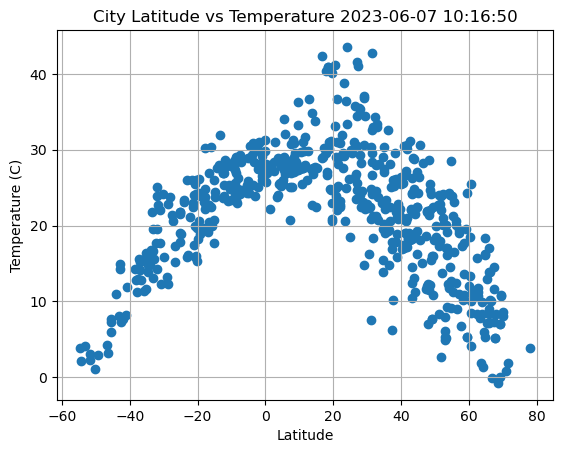

In [23]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
# I used the following source to convert the date:
# Cyberbemon, cyberbemoncyberbemon&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 2, Serge BallestaSerge Ballesta&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 143k1111 gold badges122122 silver badges249249 bronze badges, Julien SpronckJulien Spronck&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 14.9k44 gold badges4747 silver badges5555 bronze badges, &amp; textshelltextshell&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 1. (1962, February 1). Datetime.fromtimestamp vs datetime.utcfromtimestamp, which one is safer to use?. Stack Overflow. https://stackoverflow.com/questions/30921399/datetime-fromtimestamp-vs-datetime-utcfromtimestamp-which-one-is-safer-to-use 
city_date = datetime.datetime.fromtimestamp(city_data_df["Date"][0])
plt.title(f"City Latitude vs Temperature {city_date}")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

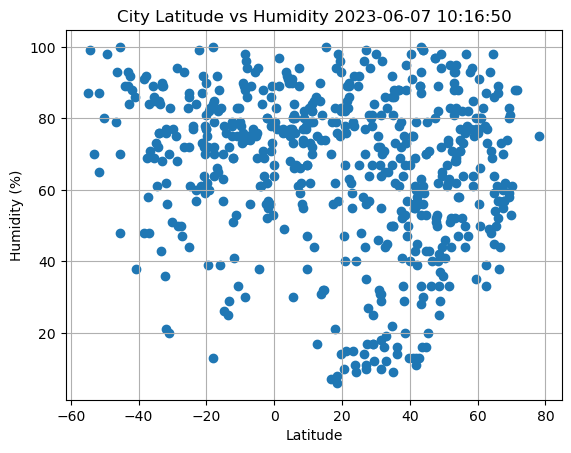

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# I used the following source to convert the date:
# Cyberbemon, cyberbemoncyberbemon&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 2, Serge BallestaSerge Ballesta&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 143k1111 gold badges122122 silver badges249249 bronze badges, Julien SpronckJulien Spronck&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 14.9k44 gold badges4747 silver badges5555 bronze badges, &amp; textshelltextshell&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 1. (1962, February 1). Datetime.fromtimestamp vs datetime.utcfromtimestamp, which one is safer to use?. Stack Overflow. https://stackoverflow.com/questions/30921399/datetime-fromtimestamp-vs-datetime-utcfromtimestamp-which-one-is-safer-to-use 
city_date = datetime.datetime.fromtimestamp(city_data_df["Date"][0])
plt.title(f"City Latitude vs Humidity {city_date}")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

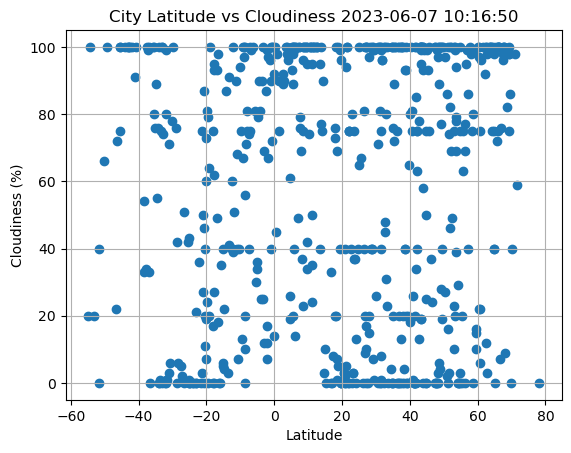

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# I used the following source to convert the date:
# Cyberbemon, cyberbemoncyberbemon&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 2, Serge BallestaSerge Ballesta&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 143k1111 gold badges122122 silver badges249249 bronze badges, Julien SpronckJulien Spronck&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 14.9k44 gold badges4747 silver badges5555 bronze badges, &amp; textshelltextshell&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 1. (1962, February 1). Datetime.fromtimestamp vs datetime.utcfromtimestamp, which one is safer to use?. Stack Overflow. https://stackoverflow.com/questions/30921399/datetime-fromtimestamp-vs-datetime-utcfromtimestamp-which-one-is-safer-to-use 
city_date = datetime.datetime.fromtimestamp(city_data_df["Date"][0])
plt.title(f"City Latitude vs Cloudiness {city_date}")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

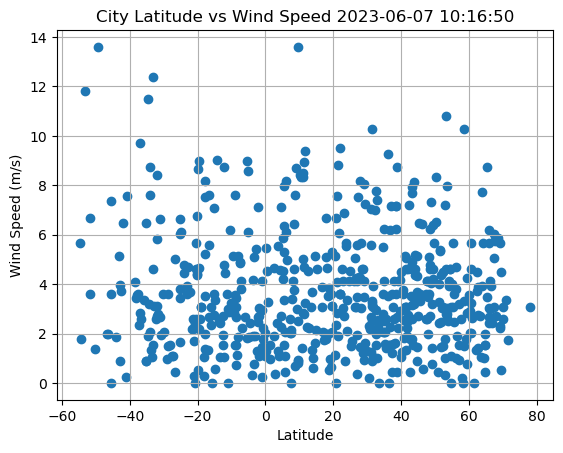

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# I used the following source to convert the date:
# Cyberbemon, cyberbemoncyberbemon&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 2, Serge BallestaSerge Ballesta&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 143k1111 gold badges122122 silver badges249249 bronze badges, Julien SpronckJulien Spronck&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 14.9k44 gold badges4747 silver badges5555 bronze badges, &amp; textshelltextshell&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 1. (1962, February 1). Datetime.fromtimestamp vs datetime.utcfromtimestamp, which one is safer to use?. Stack Overflow. https://stackoverflow.com/questions/30921399/datetime-fromtimestamp-vs-datetime-utcfromtimestamp-which-one-is-safer-to-use 
city_date = datetime.datetime.fromtimestamp(city_data_df["Date"][0])
plt.title(f"City Latitude vs Wind Speed {city_date}")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def linearregression(x_values, y_values, x_label, y_label, x_pos, y_pos, title):
    # Run the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get the regression values
    regress_values = x_values * slope + intercept
    # Find the best fit line
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create the scatterplot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # Add x-label
    plt.xlabel(x_label)
    # Add y-label
    plt.ylabel(y_label)
    plt.title(title)
    # Add line of best fit equation to the graph
    plt.annotate(line_eq,(x_pos,y_pos),fontsize=15,color="red")
    # Find r-squared value
    print(f"The r-value is: {rvalue**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hawaiian paradise park,19.5933,-154.9731,20.57,93,0,2.06,US,1686151012
3,alibag,18.6411,72.8792,31.04,76,7,3.83,IN,1686151131
4,pacific grove,36.6177,-121.9166,14.81,88,100,1.54,US,1686151131
5,utrik,11.2278,169.8474,27.55,84,24,8.33,MH,1686151022
7,wailua homesteads,22.0669,-159.3780,22.44,89,75,3.60,US,1686151012


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,14.27,89,100,3.96,AU,1686151010
2,edinburgh of the seven seas,-37.0676,-12.3116,15.15,84,33,9.72,SH,1686151001
6,puerto ayora,-0.7393,-90.3518,26.42,89,100,2.24,EC,1686151018
8,adamstown,-25.0660,-130.1015,21.75,72,43,6.65,PN,1686151000
9,ushuaia,-54.8000,-68.3000,3.79,87,20,5.66,AR,1686151010


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5253939114124554


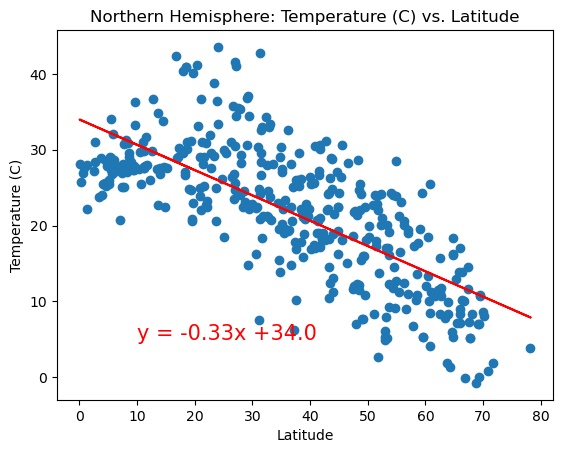

In [34]:
# Linear regression on Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Temperature (C)", 
                 10, 5, "Northern Hemisphere: Temperature (C) vs. Latitude")

The r-value is: 0.7996118159982526


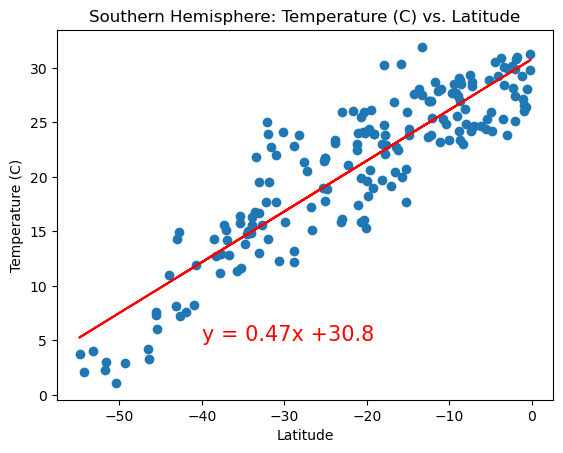

In [35]:
# Linear regression on Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Temperature (C)", -40, 5, 
                 "Southern Hemisphere: Temperature (C) vs. Latitude")

For the latitude and temperature, we can see that there is a strong linear correlation (positive in the southern hemisphere and negative in the northern hemisphere). The r-squared numbers close to one indicates that the linear correlation is strong, meaning that as you get closer to a latitude of zero degrees (closer to the equator), the temperature tends to rise, and as you move from the latitude of zero (further from the equator), temperatures tend to fall linearly.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0018276984118082442


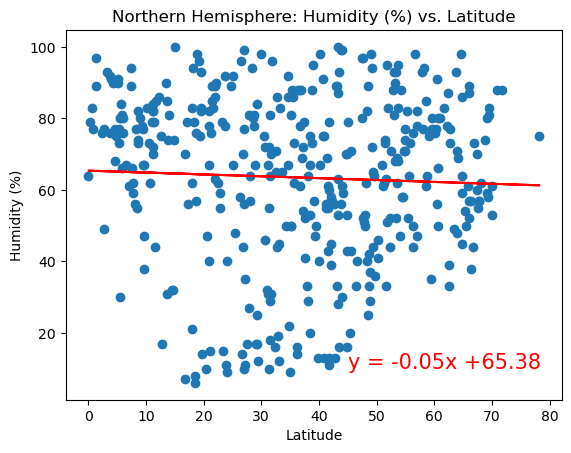

In [36]:
# Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)",  45, 10, 
                 "Northern Hemisphere: Humidity (%) vs. Latitude")

The r-value is: 0.015369124547529261


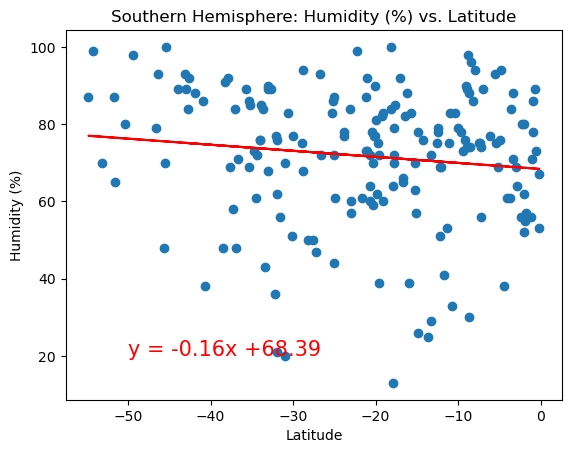

In [37]:
# Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", -50, 20, 
                 "Southern Hemisphere: Humidity (%) vs. Latitude")


The r-squared value for both the northern and southern hemisphere are low, indicating that there is likely no linear correlation between humidity and latitude. We can see the regression line is nearly horizontal in both northern and southern hemispheres, indicating that there is likely no strong relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0004580487652431475


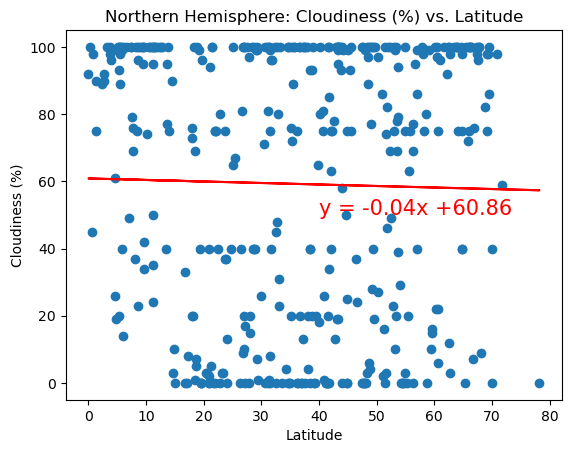

In [39]:
# Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)",  40, 50, 
                 "Northern Hemisphere: Cloudiness (%) vs. Latitude")

The r-value is: 3.4964202399839363e-06


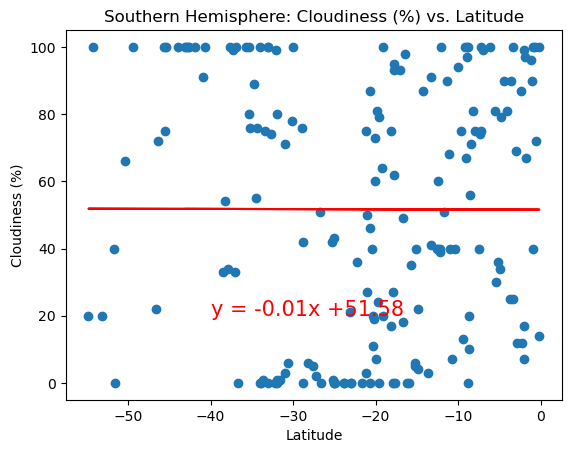

In [40]:
# Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)",  -40, 20, 
                 "Southern Hemisphere: Cloudiness (%) vs. Latitude")

There is a very low r-squared value between cloudiness and latitude, indicating that there is likely no linear correlation between the two variables. You likely cannot predict cloudiness from the latitude of a location with certainty.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003281803191573971


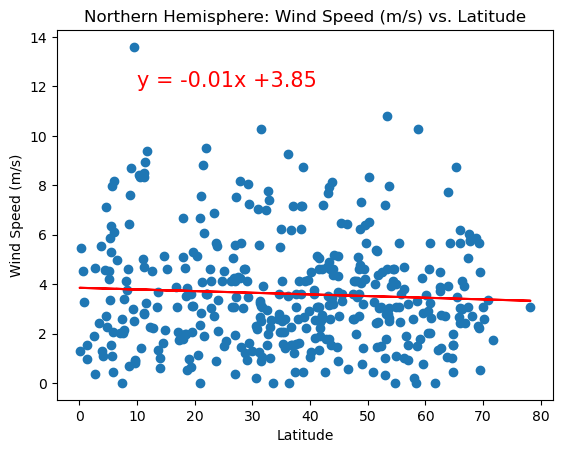

In [42]:
# Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",  10, 12, 
                 "Northern Hemisphere: Wind Speed (m/s) vs. Latitude")

The r-value is: 0.031197158302150037


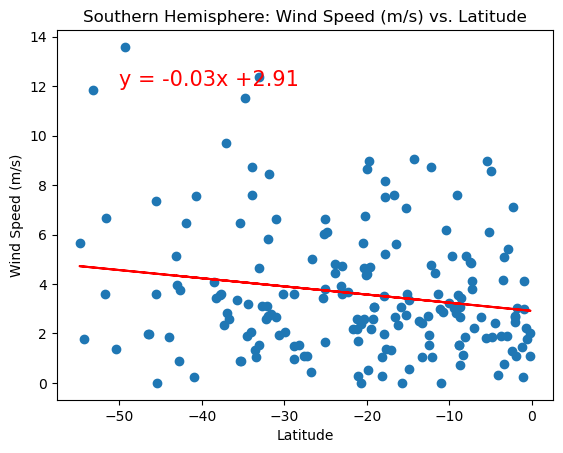

In [43]:
# Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",  -50, 12, 
                 "Southern Hemisphere: Wind Speed (m/s) vs. Latitude")

There are low r-squared values for both the northern and southern hemisphere for wind speed and latitude, indicating that there is no linear correlation between the two variables. We cannot say with certainty that we can predict wind speed from the latitude of a location.